In [1]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

!echo deb http://packages.cloud.google.com/apt gcsfuse-bionic main > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse
# !mkdir pec-data
# !gcsfuse --implicit-dirs pec-data pec

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   107k      0 --:--:-- --:--:-- --:--:--  112k
OK
28 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.41.7).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 28 not upgraded.


In [2]:
import os
import pickle
from matplotlib import pyplot as plt

In [3]:
with open('pec-data/valid_cleaned_bert.pkl', 'rb') as f:
    data = pickle.load(f)

type(data), len(data)

(list, 19868)

In [4]:
users_count_persona = {}

for conversation in data:
    for user in conversation:
        if user[0] not in users_count_persona:
            users_count_persona[user[0]] = [0, []]
        
        users_count_persona[user[0]] = [users_count_persona[user[0]][0] + 1, user[1]]

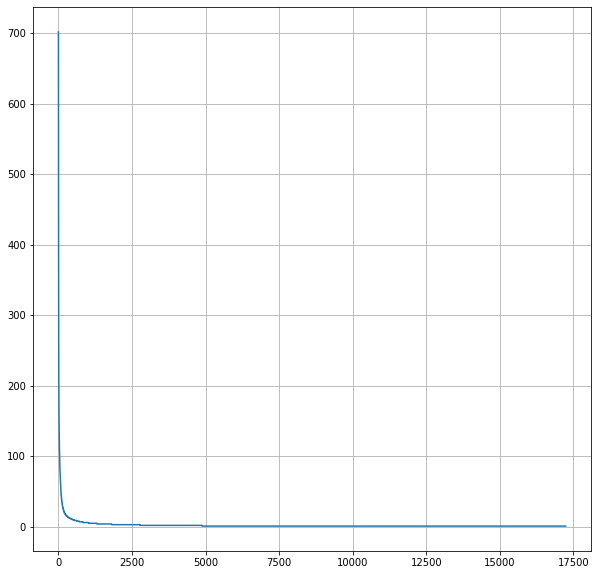

In [5]:
plt.figure(0, figsize=(10,10))
plt.plot(sorted([users_count_persona[key][0] for key in users_count_persona], reverse=True))
plt.grid(True)

In [6]:
len(list(filter(lambda x: x>25, [users_count_persona[key][0] for key in users_count_persona])))

164

In [7]:
data[0]

[('mrs_sample',
  ["i've just finished writing my phd!!",
   'i just wanted to tell someone, everyone at home is sleeping.',
   "i can't believe i've finished!!",
   ':)']),
 ('tallgirl32',
  ['congratulations!!!!!!',
   'that is an amazing accomplishment!',
   'i say, screw it!',
   'wake everyone up.',
   "you've earned it!",
   ':-)'])]